In [1]:
import cv2

In [2]:
import requests
with open('kaptcha.jpg', 'wb') as f:
    res = requests.get('http://gcis.nat.gov.tw/pub/kaptcha.jpg')
    f.write(res.content)

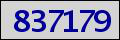

In [3]:
from PIL import Image
import numpy
image = Image.open('kaptcha.jpg')
image

In [4]:
pil_image = Image.open('kaptcha.jpg').convert('RGB')
open_cv_image = numpy.array(pil_image)

In [5]:
# open_cv_image

Populating the interactive namespace from numpy and matplotlib


/home/shine/anaconda3/envs/tensorflow_py3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


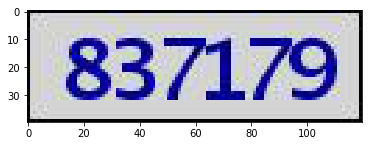

In [6]:
%pylab inline
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(open_cv_image)
plt.show()

In [7]:
imgray = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [8]:
cnts = sorted([(c, cv2.boundingRect(c)[0]) for c in contours], key=lambda x:x[1])

In [9]:
ary = []
for (c,_) in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    print((x, y, w, h))
    if w >= 15 and h == 24:
        ary.append((x, y, w, h))
    

(1, 1, 118, 38)
(13, 9, 18, 24)
(18, 22, 8, 7)
(19, 13, 6, 5)
(31, 9, 16, 24)
(48, 9, 17, 24)
(63, 9, 16, 24)
(79, 9, 17, 24)
(93, 9, 19, 24)
(98, 13, 9, 8)


In [10]:
print(ary)

[(13, 9, 18, 24), (31, 9, 16, 24), (48, 9, 17, 24), (63, 9, 16, 24), (79, 9, 17, 24), (93, 9, 19, 24)]


Populating the interactive namespace from numpy and matplotlib


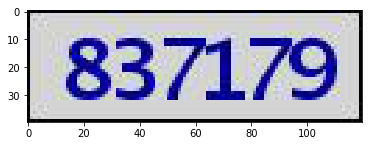

In [11]:
%pylab inline
plt.imshow(open_cv_image)
plt.show()

In [12]:
ary

[(13, 9, 18, 24),
 (31, 9, 16, 24),
 (48, 9, 17, 24),
 (63, 9, 16, 24),
 (79, 9, 17, 24),
 (93, 9, 19, 24)]

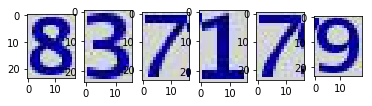

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure()
for id, (x, y , w, h) in enumerate(ary):
    roi = open_cv_image[y:y+h,x:x+w]
    thresh = roi.copy()
    a = fig.add_subplot(1, len(ary), id+1)
    plt.imshow(thresh)
    plt.show

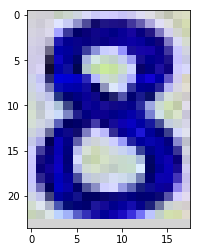

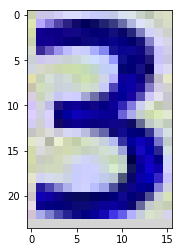

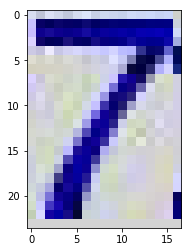

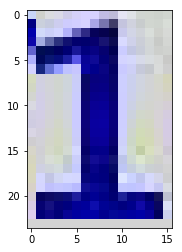

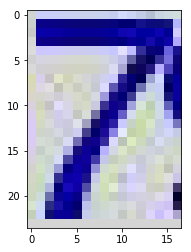

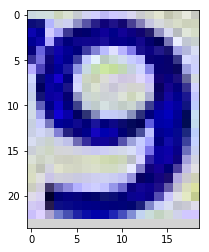

In [14]:
from matplotlib import pyplot as plt
from datetime import datetime
import time
ct = int(time.mktime(datetime.now().timetuple()))
for id, (x,y,w,h) in enumerate(ary):
    fig = plt.figure()
    roi = open_cv_image[y:y+h, x:x+w]
    thresh = roi.copy()
    plt.imshow(thresh)
    plt.savefig('{}_{}.jpg'.format(ct, id+1), dpi=100)